In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib 
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [91]:
 df = pd.read_csv("Mall_Customers.csv")

In [92]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [93]:
df.shape

(200, 5)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [95]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [96]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

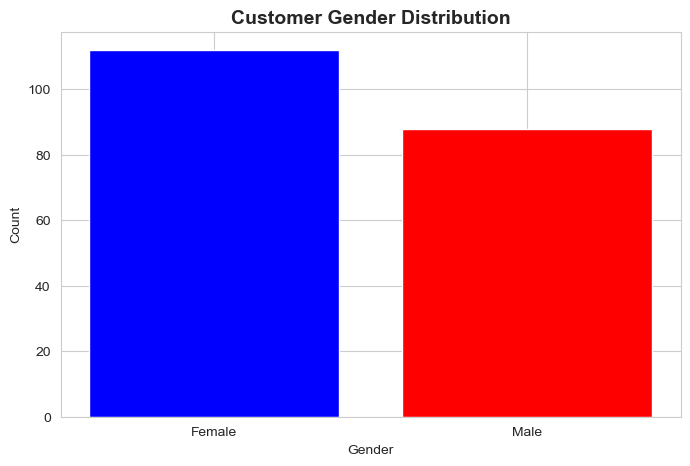

In [97]:
# Gender Distribution
plt.figure(figsize=(8,5))
gender_count = df['Gender'].value_counts()
plt.bar(gender_count.index,gender_count.values,color=['blue','red'])
plt.title("Customer Gender Distribution", fontsize=14,fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

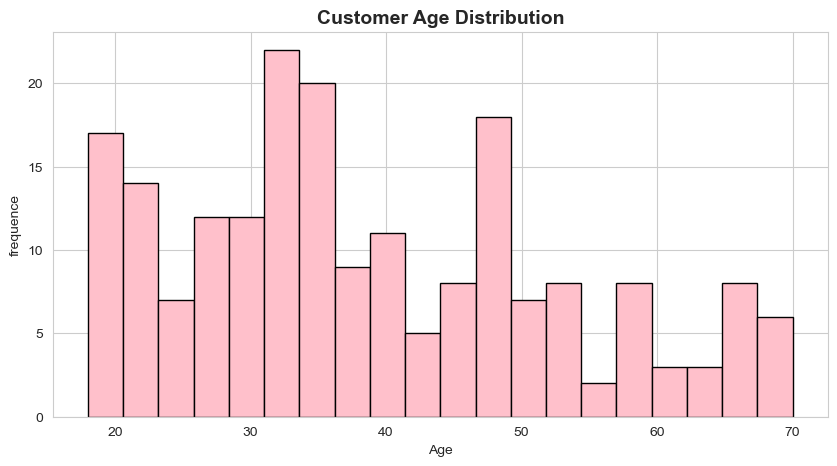

In [98]:
# Age Distribution
plt.figure(figsize=(10,5))
plt.hist(df['Age'],bins=20,color='pink',edgecolor='black')
plt.title("Customer Age Distribution", fontsize=14,fontweight='bold')
plt.xlabel('Age')
plt.ylabel('frequence')
plt.show()

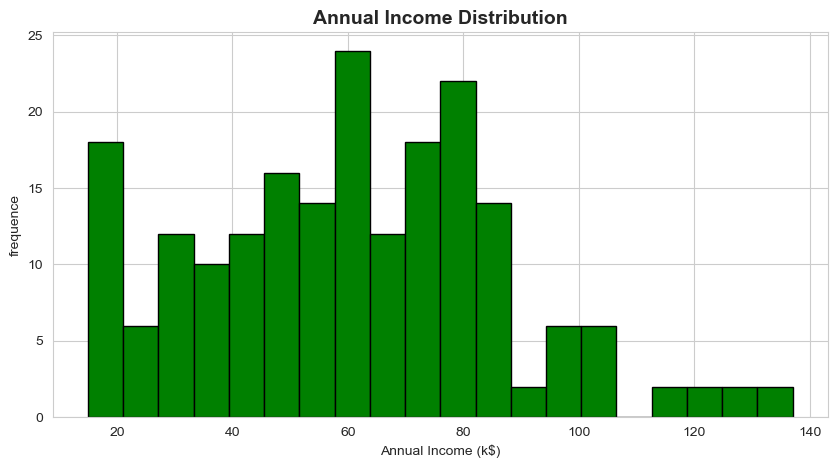

In [99]:
# Annual Income Distribution
plt.figure(figsize=(10,5))
plt.hist(df['Annual Income (k$)'],bins=20,color='green',edgecolor='black')
plt.title("Annual Income Distribution", fontsize=14,fontweight='bold')
plt.xlabel('Annual Income (k$)')
plt.ylabel('frequence')
plt.show()

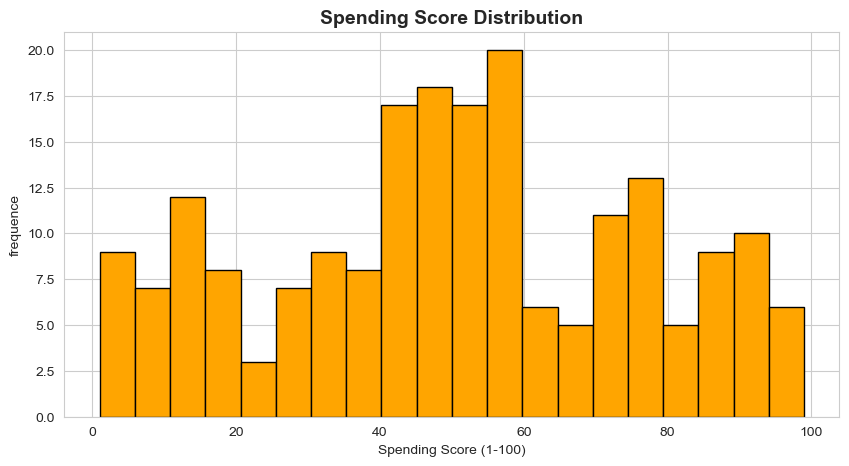

In [100]:
# Spending Score Distribution
plt.figure(figsize=(10,5))
plt.hist(df['Spending Score (1-100)'],bins=20,color='orange',edgecolor='black')
plt.title("Spending Score Distribution", fontsize=14,fontweight='bold')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('frequence')
plt.show()

In [101]:
X = df.iloc[:,[3,4]].values

In [102]:
# Calculate differnt number of cluster
wcss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

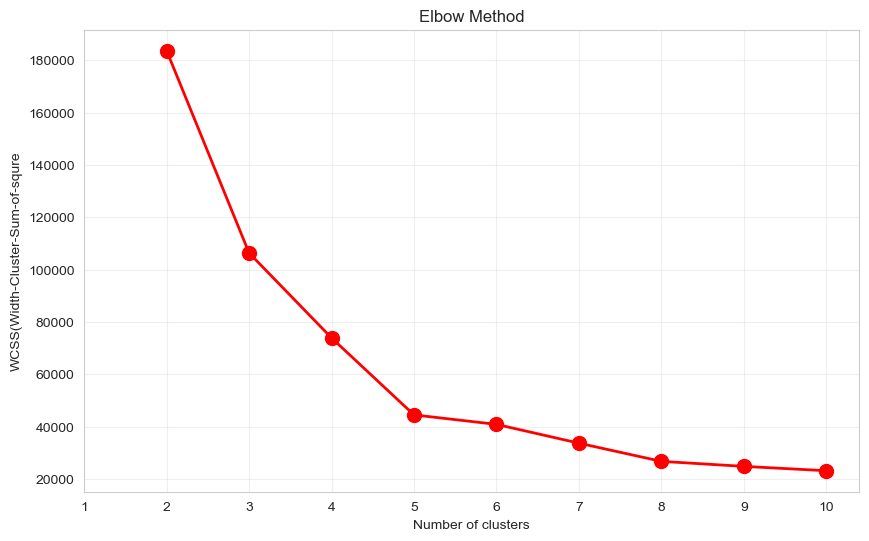

In [103]:
# Elbow graph
plt.figure(figsize=(10,6))
plt.plot(range(2,11),wcss,marker='o',color='red',linewidth=2,markersize=10)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS(Width-Cluster-Sum-of-squre")
plt.xticks(range(1,11))
plt.grid(True,alpha=0.3)
plt.show()

In [104]:
k=5
kmeans = KMeans(n_clusters=k,init='k-means++',random_state=42)
y = kmeans.fit_predict(X)

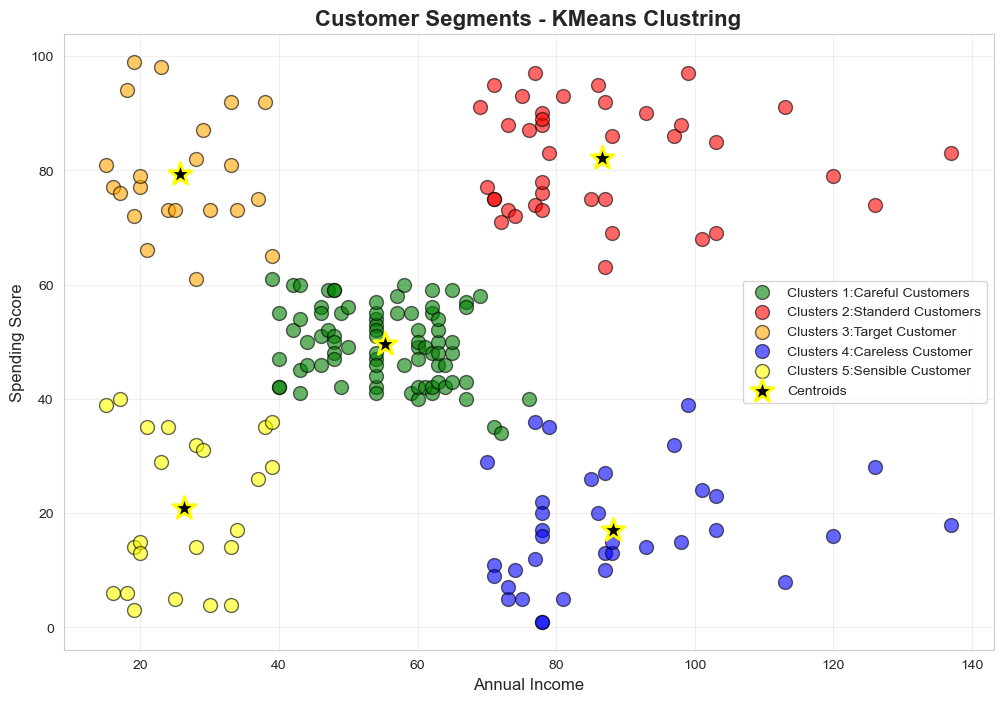

In [105]:
plt.figure(figsize=(12,8))
colors=['green','red','orange','blue','yellow']
cluster_names = ['Careful Customers','Standerd Customers','Target Customer','Careless Customer','Sensible Customer']

for i in range(5):
    plt.scatter(X[y==i,0],X[y==i,1],s=100,c=colors[i],label=f'Clusters {i+1}:{cluster_names[i]}',alpha=0.6,edgecolor='black')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='black',marker='*',label='Centroids',edgecolor='yellow',linewidths=2)
plt.title("Customer Segments - KMeans Clustring",fontsize=16,fontweight="bold")
plt.xlabel("Annual Income", fontsize=12)
plt.ylabel("Spending Score", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True,alpha=0.3)
plt.show()


In [106]:
df['cluster']=y

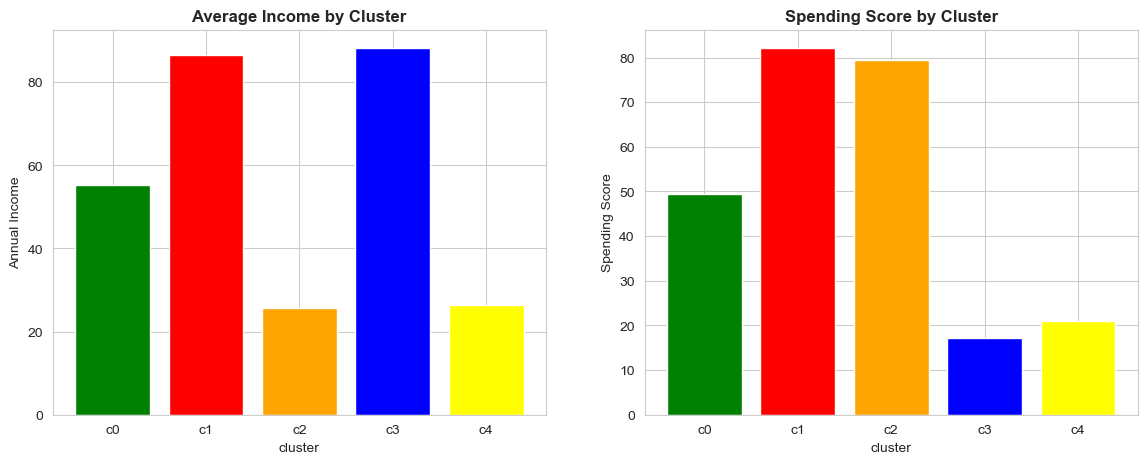

In [107]:
# Create Comparision Visualization
fig,axes = plt.subplots(1,2,figsize=(14,5))

#Income Comparision
cluster_income = [df[df['cluster']==i]['Annual Income (k$)'].mean()
    for i in range(5)]
axes[0].bar(range(5),cluster_income,color=colors)
axes[0].set_title("Average Income by Cluster",fontweight='bold')
axes[0].set_xlabel('cluster')
axes[0].set_ylabel('Annual Income')
axes[0].set_xticks(range(5))
axes[0].set_xticklabels([f'c{i}' for i in range(5)])

#spending Comparision 
cluster_spending = [df[df['cluster']==i]['Spending Score (1-100)'].mean()
    for i in range(5)]
axes[1].bar(range(5),cluster_spending,color=colors)
axes[1].set_title("Spending Score by Cluster",fontweight='bold')
axes[1].set_xlabel('cluster')
axes[1].set_ylabel('Spending Score')
axes[1].set_xticks(range(5))
axes[1].set_xticklabels([f'c{i}' for i in range(5)])

plt.show()

In [108]:
# Save model 
joblib.dump(kmeans,'customer_segmentation_model.pkl')
print("Model Saved")

Model Saved
